In [25]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

def count_islands_from_file(filepath):
    with open(filepath, 'r') as f:
        board = []
        for line in f:
            line = line.strip()
            if not line:
                continue
            row = [int(x) for x in line.split(',')]
            board.append(row)
    count = sum(val > 0 for row in board for val in row)
    return count

csv_path = 'Results/experiment_results.csv'
input_folder = 'Inputs/'

df = pd.read_csv(csv_path)

def get_num_islands(filename):
    input_path = os.path.join(input_folder, filename)
    if os.path.exists(input_path):
        return count_islands_from_file(input_path)
    else:
        print(f"Warning: {input_path} không tồn tại!")
        return None

df['num_islands'] = df['filename'].apply(get_num_islands)
df = df.dropna(subset=['num_islands'])
df['num_islands'] = df['num_islands'].astype(int)



C:\Users\Admin\AppData\Local\Temp\ipykernel_4000\641273441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_node['node_expanded'] = df_node['node_expanded'].astype(int)
C:\Users\Admin\AppData\Local\Temp\ipykernel_4000\641273441.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(solvers))


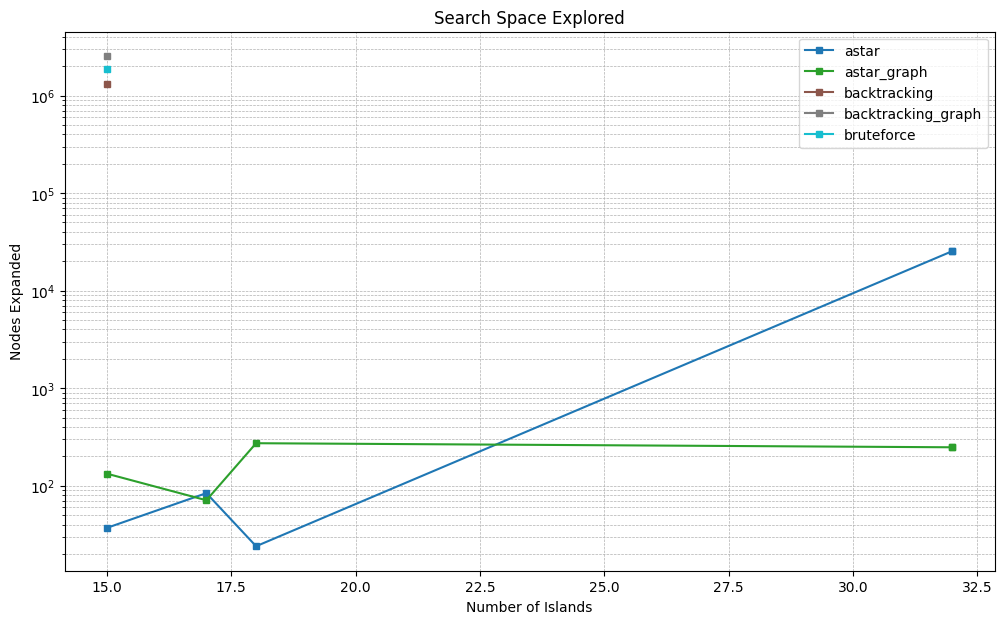

In [30]:

df_node = df[df['node_expanded'].notna()]
df_node['node_expanded'] = df_node['node_expanded'].astype(int)

plt.figure(figsize=(12, 7))
solvers = df_node['solver'].unique()
colors = plt.cm.get_cmap('tab10', len(solvers))

for i, solver in enumerate(solvers):
    sub_df = df_node[df_node['solver'] == solver]
    sub_df = sub_df.sort_values(by='num_islands')
    plt.plot(sub_df['num_islands'], sub_df['node_expanded'], 
             marker='s', markersize=4, label=solver, color=colors(i))

plt.xlabel('Number of Islands')
plt.ylabel('Nodes Expanded')
plt.yscale('log')  # Log scale cho trục y
plt.title('Search Space Explored')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


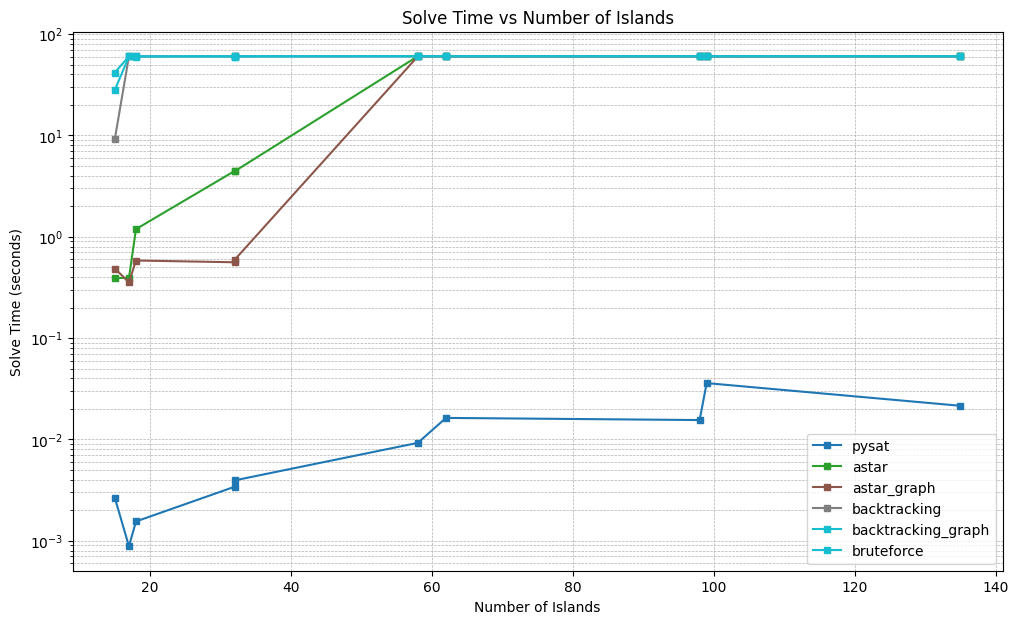

In [32]:
plt.figure(figsize=(12, 7))
solvers = df['solver'].unique()
for i, solver in enumerate(solvers):
    sub_df = df[df['solver'] == solver]
    sub_df = sub_df.sort_values(by='num_islands')
    plt.plot(sub_df['num_islands'], sub_df['time'], 
             marker='s',markersize=4,label=solver, color=colors(i))

plt.xlabel('Number of Islands')
plt.ylabel('Solve Time (seconds)')
plt.yscale('log')  # Nếu muốn log scale cho thời gian
plt.title('Solve Time vs Number of Islands')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


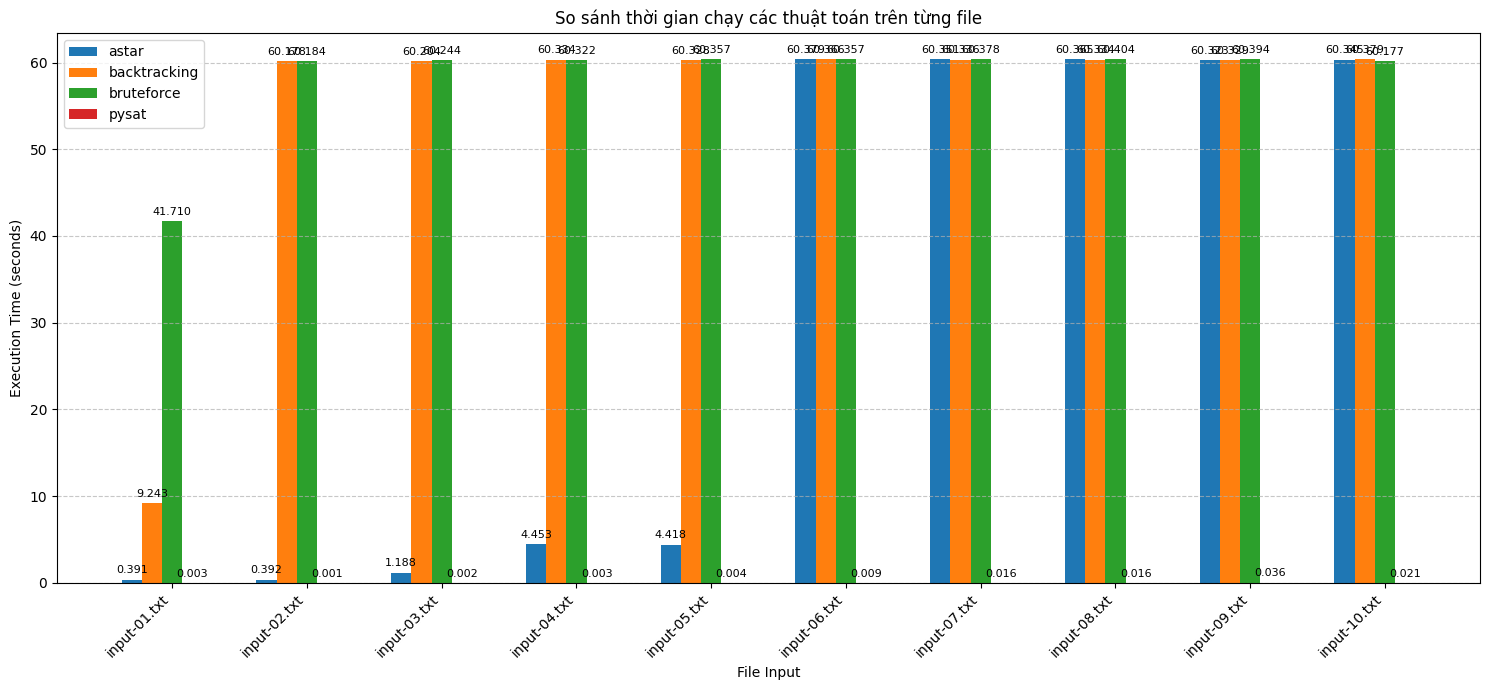

In [33]:

    df_valid = df[(df['time'] > 0)].copy()
    df_valid['time'] = pd.to_numeric(df_valid['time'], errors='coerce')

    files = sorted(df_valid['filename'].unique())
    solvers = sorted(df_valid['solver'].unique())

    x = np.arange(len(files)) 
    width = 0.15  

    fig, ax = plt.subplots(figsize=(15, 7))

    # Hàm gán nhãn số lên đầu thanh bar
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            if height > 0:  # chỉ hiện nếu giá trị lớn hơn 0
                ax.annotate(f'{height:.3f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # offset label lên trên thanh
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=8)

    # Loại bỏ 2 thuật toán không muốn vẽ
    solvers = [s for s in solvers if s not in ('backtracking_graph', 'astar_graph')]

    # Vẽ cột cho từng solver, đồng thời gán nhãn
    for i, solver in enumerate(solvers):
        times = []
        for f in files:
            val = df_valid[(df_valid['filename'] == f) & (df_valid['solver'] == solver)]['time']
            if not val.empty:
                times.append(val.values[0])
            else:
                times.append(0)
        rects = ax.bar(x + i*width - width*(len(solvers)/2), times, width, label=solver)
        autolabel(rects)

    ax.set_xlabel('File Input')
    ax.set_ylabel('Execution Time (seconds)')
    ax.set_title('So sánh thời gian chạy các thuật toán trên từng file')
    ax.set_xticks(x)
    ax.set_xticklabels(files, rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
